<a href="https://colab.research.google.com/github/dinuka125/japura-Git-Workshop/blob/master/predictions_with_lstm_SAMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')
path ='/content/drive/My Drive/csv_files/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np

data=np.load(path+'datasamp.npy')
target=np.load(path+'targetsamp.npy')

In [6]:
data.shape
target.shape

(2559,)

In [7]:
train_data=data[:1791]
train_target=target[:1791]

test_data=data[1791:]
test_target=target[1791:]

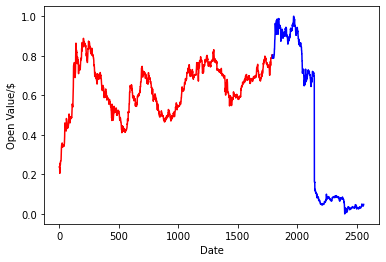

In [8]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1791,2559,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [9]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(data.shape[1:])))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))

model.compile(loss='mse',optimizer='adam',metrics=['mse', 'mae', 'mape'])

In [10]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.10)

Epoch 1/200
51/51 [==============================] - 15s 176ms/step - loss: 0.0739 - mse: 0.0739 - mae: 0.1922 - mape: 31.2481 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0456 - val_mape: 6.0964
Epoch 2/200
51/51 [==============================] - 7s 144ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0579 - mape: 9.7019 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0305 - val_mape: 4.0855
Epoch 3/200
51/51 [==============================] - 7s 144ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0499 - mape: 7.9796 - val_loss: 0.0021 - val_mse: 0.0021 - val_mae: 0.0379 - val_mape: 5.1070
Epoch 4/200
51/51 [==============================] - 7s 143ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0501 - mape: 8.0594 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0467 - val_mape: 6.3088
Epoch 5/200
51/51 [==============================] - 7s 143ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0467 - mape: 7.5172 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0291 - val_mape: 3.9086
Epo

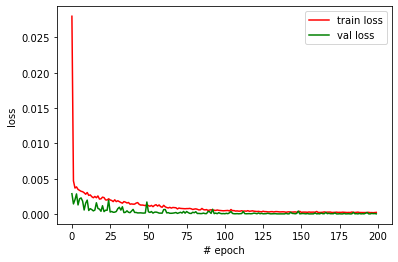

In [11]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)
print(result.shape)
print(test_target.shape)

r2 score: 0.9874976272209205
(768, 1)
(768,)


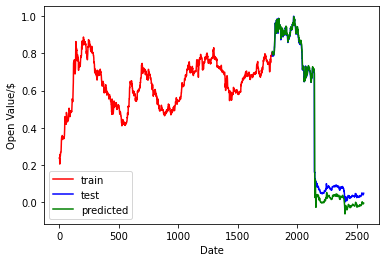

In [13]:
#test_x_range=np.arange(1000,1209,1)
test_x_range=np.arange(1791,2559,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

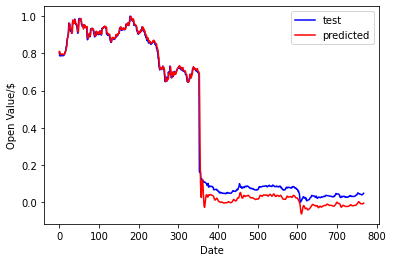

In [14]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'r',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

In [15]:
model.save_weights("JHK Stock Model new.h5")